OCSVM linear Balanced Accuracy: 0.9803921568627452
OCSVM linear ROC AUC: 0.9992156862745097


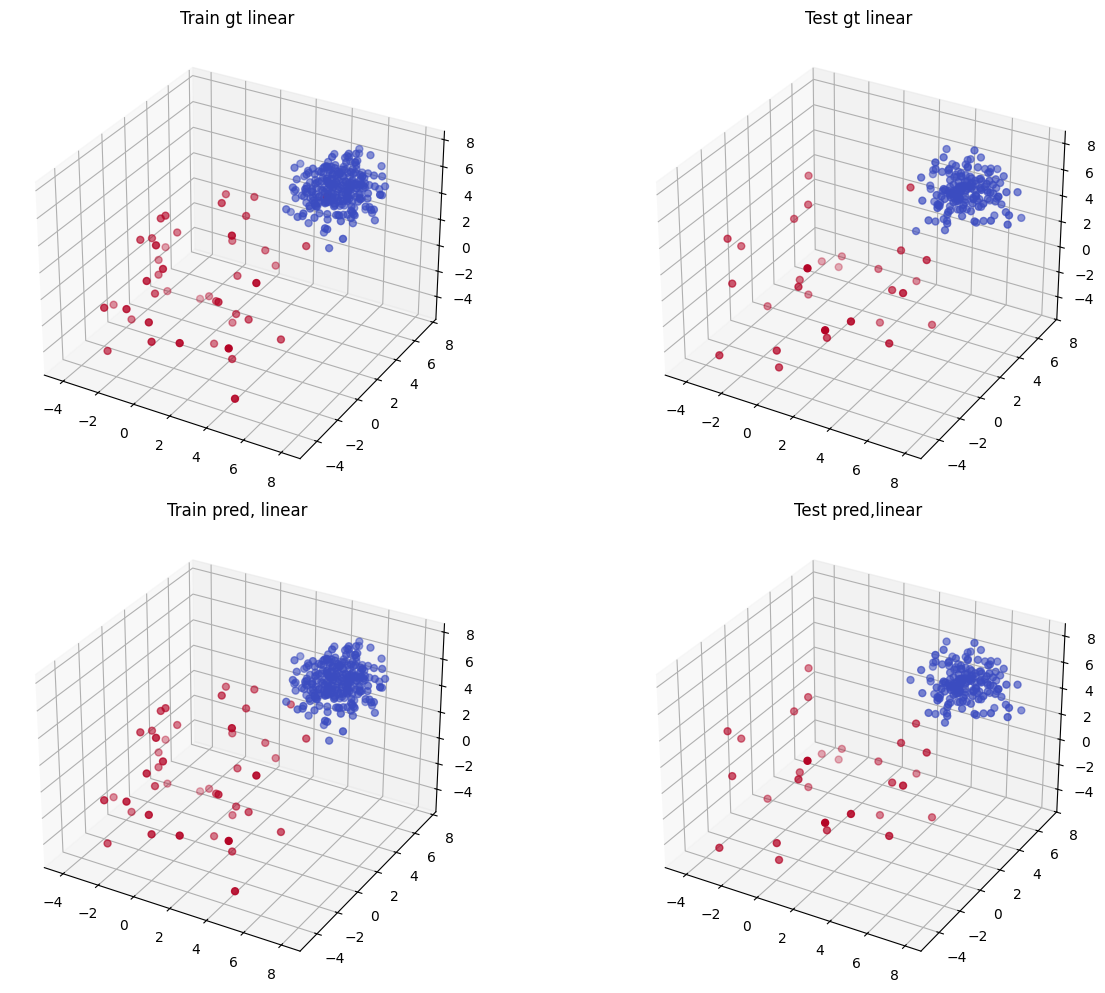

OCSVM rbf Balanced Accuracy: 0.9774509803921569
OCSVM rbf ROC AUC: 0.9968627450980392


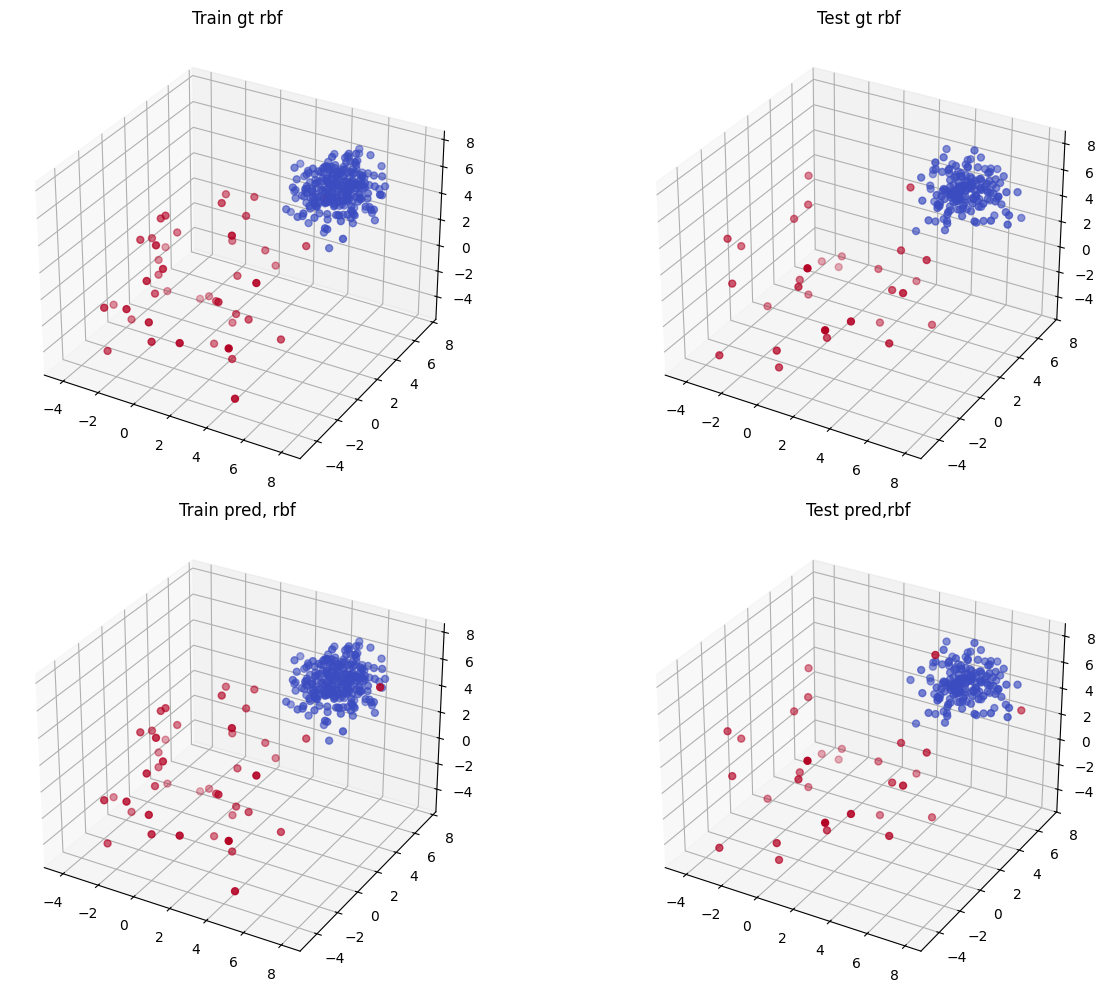

Epoch 1/100, Loss: 1.0073201805353165
Epoch 2/100, Loss: 0.8514826372265816
Epoch 3/100, Loss: 0.8704767040908337
Epoch 4/100, Loss: 0.970043919980526
Epoch 5/100, Loss: 0.9115837216377258
Epoch 6/100, Loss: 0.9540438540279865
Epoch 7/100, Loss: 0.9786504842340946
Epoch 8/100, Loss: 0.8916454985737801
Epoch 9/100, Loss: 0.9404874555766582
Epoch 10/100, Loss: 0.9965227283537388
Epoch 11/100, Loss: 0.9760217145085335
Epoch 12/100, Loss: 0.9656988084316254
Epoch 13/100, Loss: 0.9989443719387054
Epoch 14/100, Loss: 0.9325649067759514
Epoch 15/100, Loss: 0.9495402164757252
Epoch 16/100, Loss: 0.9213194474577904
Epoch 17/100, Loss: 0.9479644484817982
Epoch 18/100, Loss: 0.9023100603371859
Epoch 19/100, Loss: 0.978189866989851
Epoch 20/100, Loss: 0.8520215023308992
Epoch 21/100, Loss: 0.9488257504999638
Epoch 22/100, Loss: 0.9228901378810406
Epoch 23/100, Loss: 0.9410247653722763
Epoch 24/100, Loss: 1.0555766858160496
Epoch 25/100, Loss: 0.9474343582987785
Epoch 26/100, Loss: 0.91899210214614

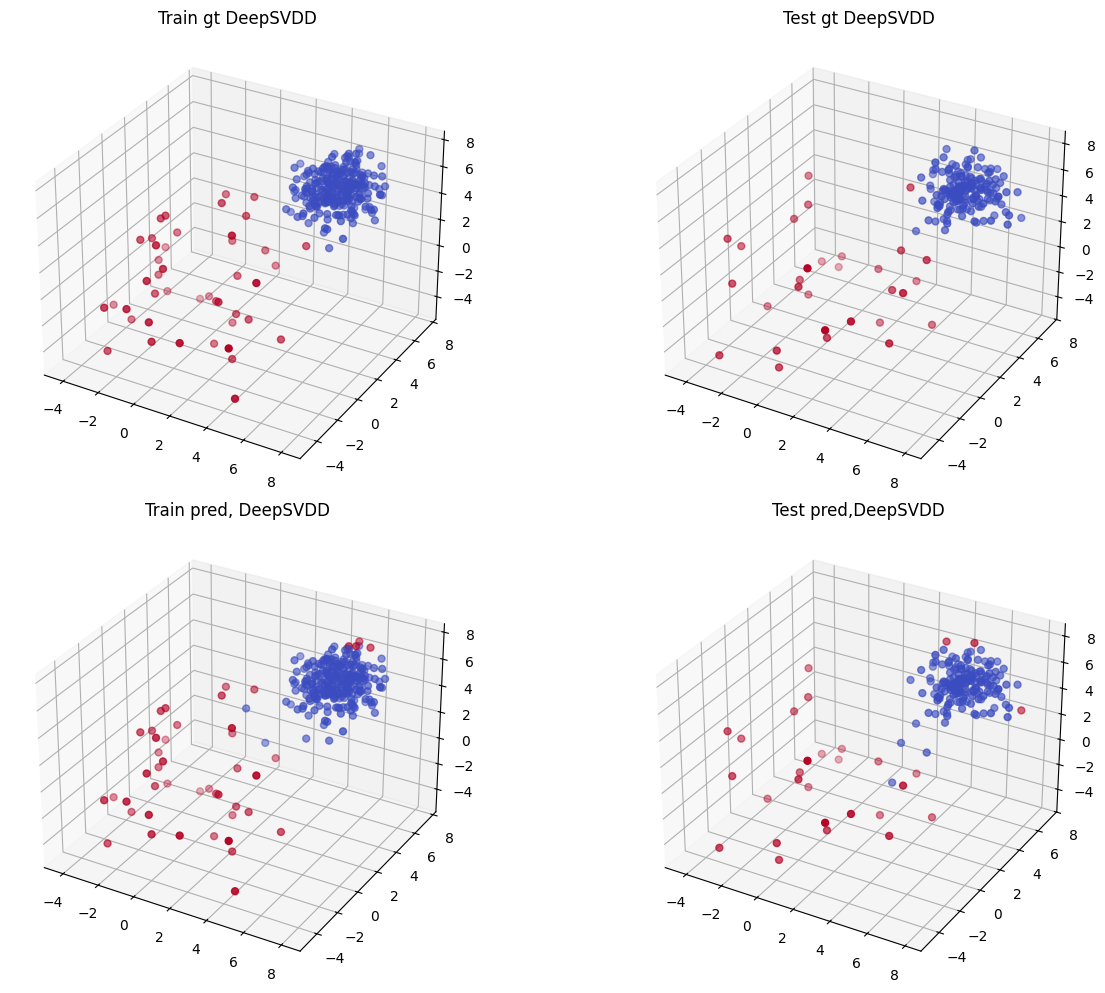

In [38]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD

from sklearn.metrics import balanced_accuracy_score, roc_auc_score


# Ex. 1
# 1. In the first exercise you will use generate data() function from pyod.utils.data
# to generate a 3-dimensional dataset with 300 training samples and 200 test
# samples using a contamination of 0.15.
# 2. You will fit an OCSVM model (from pyod.models.ocsvm) using the
# training data and then you will predict the labels for test data. Use the
# model kernel and the contamination rate specified above. Compute the
# balanced accuracy and the ROC AUC for the test data.
# 3. Create 4 3D subplots where you will plot the test and training data (using
# different colors for inliers and outliers) for both the ground truth and the
# predicted labels.
# 4. Observe how the predicted labels change when you use an RBF kernel.
# 5. Perform steps 2 and 3 for DeepSVDD model from pyod.models.deep svdd


def plot_3d(ax, X, labels, title):
    ax.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=labels,
        cmap="coolwarm",
        s=25
    )
    ax.set_title(title)

def do_all_work_for_model(ocsv_model, model_title):
    ocsv_model.fit(X_train)
    y_pred_model = ocsv_model.predict(X_test)
    y_train_pred_model= ocsv_model.predict(X_train)

    balacc_model = balanced_accuracy_score(y_test, y_pred_model)
    roc_model = roc_auc_score(y_test, ocsv_model.decision_function(X_test))
    # print(y_test)
    # print(ocsv_model.decision_function(X_test))

    print("OCSVM " + model_title + " Balanced Accuracy:", balacc_model)
    print("OCSVM " + model_title + " ROC AUC:", roc_model)


    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(221, projection="3d")
    plot_3d(ax1, X_train, y_train, "Train gt " + model_title)

    ax2 = fig.add_subplot(222, projection="3d")
    plot_3d(ax2, X_test, y_test, "Test gt " + model_title)

    ax3 = fig.add_subplot(223, projection="3d")
    plot_3d(ax3, X_train, y_train_pred_model, "Train pred, " + model_title)

    ax4 = fig.add_subplot(224, projection="3d")
    plot_3d(ax4, X_test, y_pred_model, "Test pred," + model_title)

    plt.tight_layout()
    plt.show()


X_train, X_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=1
)

# OCSVM linear
ocsvm_linear = OCSVM(kernel="linear", contamination=0.15)

do_all_work_for_model(ocsvm_linear, "linear")
# OCSVM rbf
ocsvm_rbf = OCSVM(kernel="rbf", contamination=0.15)
do_all_work_for_model(ocsvm_rbf, "rbf")

# DEEPSVDD
deep_svdd = DeepSVDD(
    n_features=X_train.shape[1],
    contamination=0.15,
    epochs=100,
    hidden_neurons=[32, 64, 16]
)
do_all_work_for_model(deep_svdd, "DeepSVDD")


In [ ]:
# Ex. 2
# 1. In this exercise you will use the cardio dataset from ODDS (https://
# odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/). You will split
# the dataset into a training set consisting of 40% of the data and a testing
# set.
# 2. You will use a cross-validation grid-search over a predefined map of possible parameters of OneClassSVM (from sklearn.svm) in order to find
# the ones that offer best results. The map of possible parameters must
# contain different kernels, different values for gamma parameter (for kernels that use it) and different values for the ν parameter (including the
# contamination rate of train set).
# 3. GridSearchCV from sklearn.model selection will be used to perform the
# grid-search over the training set using Balanced Accuracy as score. The
# same metric will be reported for the model trained with the best parameters discovered by GridSearchCV (tested on the test set).
# 4. GridSearchCV will have to perform standardization; for this, it will
# use a Pipeline from sklearn.pipeline that will perform standardization
# using StandardScaler before fitting the OneClassSVM model.
# 5. You have to pay attention to the labels returned by OneClassSVM model
# (from sklearn): -1 for outliers and 1 for inliers. If you want to convert
# them to the pyod format you can use
# label pyod = (−1 ∗ label sklearn + 1)/2
# In the current exercise you will perform the conversion from pyod format
# to sklearn for the ground truth labels
# 6. Print the best parameters discovered by GridSearchCV and the balanced accuracy obtained by the model (trained with those parameters on
# the entire training dataset) when evaluating the testing set.

import numpy as np
from scipy.io import loadmat

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer

# 1
data = loadmat("cardio 1.mat")
X = data["X"]
y_arranged = data["y"].ravel().astype(int)

print(X)
print(y_arranged)

y_sklearn = 1 - 2 * y_arranged   # 0 -> 1, 1 -> -1

X_train, X_test, y_train_skl, y_test_skl, y_train_pyod, y_test_pyod = train_test_split(
    X,
    y_sklearn,
    y_arranged,
    train_size=0.4,
    test_size=0.6,
    stratify=y_sklearn,
    random_state=1,
)

cont_train = y_train_pyod.mean()
print(f"Train contamination (pyod format): {cont_train:}")


pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("ocsvm", OneClassSVM())
    ]
)

params = {
    "ocsvm__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "ocsvm__gamma": ["scale", "auto", 0.01, 0.1, 1.0],
    "ocsvm__nu": [0.01, 0.05, cont_train, 0.15, 0.2, 0.3],
}

scorer = make_scorer(balanced_accuracy_score)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_train, y_train_skl)

print("best params:")
print(grid.best_params_)

print(f"best balanced accuracy train: {grid.best_score_:}")




best_model = grid.best_estimator_

y_pred_test = best_model.predict(X_test)  # -1 / 1

test_balacc = balanced_accuracy_score(y_test_skl, y_pred_test)

print(f"balanced accuracy w best params test: {test_balacc:}")


[[ 0.00491231  0.69319077 -0.20364049 ...  0.23149795 -0.28978574
  -0.49329397]
 [ 0.11072935 -0.07990259 -0.20364049 ...  0.09356344 -0.25638541
  -0.49329397]
 [ 0.21654639 -0.27244466 -0.20364049 ...  0.02459619 -0.25638541
   1.14001753]
 ...
 [-0.41835583 -0.91998844 -0.16463485 ... -1.49268341  0.24461959
  -0.49329397]
 [-0.41835583 -0.91998844 -0.15093411 ... -1.42371616  0.14441859
  -0.49329397]
 [-0.41835583 -0.91998844 -0.20364049 ... -1.28578165  3.58465295
  -0.49329397]]
[0 0 0 ... 1 1 1]
Train contamination (pyod format): 0.0956
Fitting 5 folds for each of 120 candidates, totalling 600 fits
best params:
{'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.2}
best balanced accuracy train: 0.8873
balanced accuracy w best params test: 0.8665


In [ ]:
# Ex. 3
# 1. For this exercise we will need to download the shuttle dataset from ODDS
# (https://odds.cs.stonybrook.edu/shuttle-dataset/). Load the data
# using scipy.io.loadmat() and use train test split() to split it into train
# and test subsets (use 50% of data for testing). Normalize your data accordingly.
# 2. Fit OCSVM and DeepSVDD models (from pyod) using the training data and compute the balanced accuracy (BA) and the area under the curve for the testing data for both models (ROC AUC - using
# sklearn.metrics.roc auc score).
# 3. Use different architectures for DeepSVDD and compute the 2 aforementioned metrics for each case.


data = loadmat("shuttle 1.mat")
X = data["X"]
y_pyod = data["y"].ravel()  # 0 / 1

y_skl = 1 - 2 * y_pyod # -1 / 1

X_train, X_test, y_train_skl, y_test_skl = train_test_split(
    X, y_skl, test_size=0.5, stratify=y_skl, random_state=42
)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

ocsvm = OCSVM(kernel="rbf", contamination=y_pyod.mean())
ocsvm.fit(X_train_s)

y_pred_oc = ocsvm.predict(X_test_s)
score_oc = ocsvm.decision_function(X_test_s)

ba_oc = balanced_accuracy_score(y_test_skl, y_pred_oc)
auc_oc = roc_auc_score(y_test_skl, score_oc)

print(f"OC-SVM BA: {ba_oc:}, ROC AUC: {auc_oc:}")

OC-SVM BA: 0.001996226911771158, ROC AUC: 0.9913999442541555


/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [58]:
deep_svdd = DeepSVDD(
    n_features=X_train_s.shape[1],
    contamination=y_pyod.mean(),
    epochs=50,
    hidden_neurons=[64, 32],
)

deep_svdd.fit(X_train_s)

y_pred_svdd = deep_svdd.predict(X_test_s)
score_svdd = deep_svdd.decision_function(X_test_s)

ba_svdd = balanced_accuracy_score(y_test_skl, y_pred_svdd)
auc_svdd = roc_auc_score(y_test_skl, score_svdd)

print(f"DeepSVDD (64-32) BA: {ba_svdd:}, ROC AUC: {auc_svdd:}")

Epoch 1/50, Loss: 457.5421218127012
Epoch 2/50, Loss: 457.6392465978861
Epoch 3/50, Loss: 457.44579220563173
Epoch 4/50, Loss: 460.92523792386055
Epoch 5/50, Loss: 457.441225156188
Epoch 6/50, Loss: 457.46914422512054
Epoch 7/50, Loss: 457.48159047961235
Epoch 8/50, Loss: 457.6596150547266
Epoch 9/50, Loss: 457.61581288278103
Epoch 10/50, Loss: 457.44657222926617
Epoch 11/50, Loss: 457.624182716012
Epoch 12/50, Loss: 458.108036711812
Epoch 13/50, Loss: 458.196830958128
Epoch 14/50, Loss: 457.7190176844597
Epoch 15/50, Loss: 457.5013198852539
Epoch 16/50, Loss: 457.8001207858324
Epoch 17/50, Loss: 457.5046083033085
Epoch 18/50, Loss: 457.51405258476734
Epoch 19/50, Loss: 457.7842129319906
Epoch 20/50, Loss: 457.6514555811882
Epoch 21/50, Loss: 458.712948307395
Epoch 22/50, Loss: 457.6061812490225
Epoch 23/50, Loss: 457.6156230866909
Epoch 24/50, Loss: 457.6234607100487
Epoch 25/50, Loss: 457.63727225363255
Epoch 26/50, Loss: 457.4970269501209
Epoch 27/50, Loss: 457.48218578100204
Epoch 

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [61]:
architectures = [
    [32, 16],
    [64, 32, 16],
    [128, 64, 32],
    [32, 64, 32],
    [16, 64, 16],
    [64, 32, 16, 8],
]

results = []
best_arch = None
best_auc = -1

for arch in architectures:
    model = DeepSVDD(
        n_features=X_train_s.shape[1],
        hidden_neurons=arch,
        contamination=y_pyod.mean(),
        epochs=50,
    )
    model.fit(X_train_s)

    y_pred = model.predict(X_test_s)
    scores = model.decision_function(X_test_s)

    ba = balanced_accuracy_score(y_test_skl, y_pred)
    auc = roc_auc_score(y_test_skl, scores)

    results.append((arch, ba, auc))
    print(f"DeepSVDD {arch} BA: {ba:}, AUC: {auc:}")

    if auc > best_auc:
        best_auc = auc
        best_arch = arch

print("Best ARCH:", best_arch)
print("BEST AUC: ", best_auc)

Epoch 1/50, Loss: 242.8291480243206
Epoch 2/50, Loss: 243.04806097969413
Epoch 3/50, Loss: 243.00597167387605
Epoch 4/50, Loss: 242.82223093509674
Epoch 5/50, Loss: 242.8407782278955
Epoch 6/50, Loss: 242.86945417895913
Epoch 7/50, Loss: 242.9704062603414
Epoch 8/50, Loss: 242.82016004994512
Epoch 9/50, Loss: 242.8199854902923
Epoch 10/50, Loss: 242.91149630397558
Epoch 11/50, Loss: 242.93881287798285
Epoch 12/50, Loss: 243.02012329921126
Epoch 13/50, Loss: 243.26052886247635
Epoch 14/50, Loss: 242.82198760285974
Epoch 15/50, Loss: 242.85579311475158
Epoch 16/50, Loss: 242.7972521521151
Epoch 17/50, Loss: 242.9594858624041
Epoch 18/50, Loss: 242.81527381762862
Epoch 19/50, Loss: 242.93170339614153
Epoch 20/50, Loss: 242.81093702092767
Epoch 21/50, Loss: 243.02236822992563
Epoch 22/50, Loss: 242.813992716372
Epoch 23/50, Loss: 244.52853752300143
Epoch 24/50, Loss: 242.80381159856915
Epoch 25/50, Loss: 242.82898937165737
Epoch 26/50, Loss: 243.01269666850567
Epoch 27/50, Loss: 242.788327

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 2/50, Loss: 65.26578255090863
Epoch 3/50, Loss: 64.33854097034782
Epoch 4/50, Loss: 61.53211909066886
Epoch 5/50, Loss: 64.05331920552999
Epoch 6/50, Loss: 63.97502336464822
Epoch 7/50, Loss: 65.86872144183144
Epoch 8/50, Loss: 63.782246029470116
Epoch 9/50, Loss: 65.789286326617
Epoch 10/50, Loss: 66.96101175248623
Epoch 11/50, Loss: 68.22598064132035
Epoch 12/50, Loss: 66.23426772840321
Epoch 13/50, Loss: 63.10629294626415
Epoch 14/50, Loss: 64.32877583894879
Epoch 15/50, Loss: 68.0210513388738
Epoch 16/50, Loss: 65.760876477696
Epoch 17/50, Loss: 63.85506915487349
Epoch 18/50, Loss: 63.495045786723495
Epoch 19/50, Loss: 64.5381679367274
Epoch 20/50, Loss: 64.90960353985429
Epoch 21/50, Loss: 63.17059311363846
Epoch 22/50, Loss: 62.30025299778208
Epoch 23/50, Loss: 64.71268618386239
Epoch 24/50, Loss: 66.39869204815477
Epoch 25/50, Loss: 65.96872719191015
Epoch 26/50, Loss: 65.94010057859123
Epoch 27/50, Loss: 65.09806596580893
Epoch 28/50, Loss: 65.34966508485377
Epoch 29/50, 

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 2/50, Loss: 138.5568906776607
Epoch 3/50, Loss: 141.59022802114487
Epoch 4/50, Loss: 142.2426689863205
Epoch 5/50, Loss: 145.16041928902268
Epoch 6/50, Loss: 139.3483384512365
Epoch 7/50, Loss: 141.14968803152442
Epoch 8/50, Loss: 140.8310395181179
Epoch 9/50, Loss: 144.43372943997383
Epoch 10/50, Loss: 140.34182595461607
Epoch 11/50, Loss: 143.79537996649742
Epoch 12/50, Loss: 138.4724165033549
Epoch 13/50, Loss: 139.35296403989196
Epoch 14/50, Loss: 143.13646849244833
Epoch 15/50, Loss: 142.40735699608922
Epoch 16/50, Loss: 142.14463433250785
Epoch 17/50, Loss: 144.29903457313776
Epoch 18/50, Loss: 139.9876964110881
Epoch 19/50, Loss: 143.77898971363902
Epoch 20/50, Loss: 139.71874711103737
Epoch 21/50, Loss: 143.86851415783167
Epoch 22/50, Loss: 141.70378679409623
Epoch 23/50, Loss: 145.16845857165754
Epoch 24/50, Loss: 144.49895253777504
Epoch 25/50, Loss: 144.3286446519196
Epoch 26/50, Loss: 142.84641080722213
Epoch 27/50, Loss: 140.07784350588918
Epoch 28/50, Loss: 140.2679

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 2/50, Loss: 195.16937462240458
Epoch 3/50, Loss: 195.58734146505594
Epoch 4/50, Loss: 197.56068708002567
Epoch 5/50, Loss: 186.93790881708264
Epoch 6/50, Loss: 192.63443333283067
Epoch 7/50, Loss: 200.342298168689
Epoch 8/50, Loss: 196.6496848743409
Epoch 9/50, Loss: 195.70881515182555
Epoch 10/50, Loss: 205.14460318908095
Epoch 11/50, Loss: 191.4672803580761
Epoch 12/50, Loss: 203.2066885754466
Epoch 13/50, Loss: 200.4829819574952
Epoch 14/50, Loss: 193.2661485746503
Epoch 15/50, Loss: 201.79971720278263
Epoch 16/50, Loss: 193.40276806429029
Epoch 17/50, Loss: 191.60212633758783
Epoch 18/50, Loss: 197.95988441631198
Epoch 19/50, Loss: 196.27148693799973
Epoch 20/50, Loss: 198.97167520970106
Epoch 21/50, Loss: 198.15440845489502
Epoch 22/50, Loss: 205.93649861216545
Epoch 23/50, Loss: 195.8842824921012
Epoch 24/50, Loss: 202.94156300649047
Epoch 25/50, Loss: 191.21999425068498
Epoch 26/50, Loss: 194.6489673703909
Epoch 27/50, Loss: 193.7939548715949
Epoch 28/50, Loss: 196.4589356

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 2/50, Loss: 90.37866666726768
Epoch 3/50, Loss: 97.19758108258247
Epoch 4/50, Loss: 92.70884885638952
Epoch 5/50, Loss: 96.3535605110228
Epoch 6/50, Loss: 90.8230244629085
Epoch 7/50, Loss: 91.80322154052556
Epoch 8/50, Loss: 97.07702552527189
Epoch 9/50, Loss: 88.39854521676898
Epoch 10/50, Loss: 100.9794210717082
Epoch 11/50, Loss: 94.08045427314937
Epoch 12/50, Loss: 89.70341430976987
Epoch 13/50, Loss: 98.69300775043666
Epoch 14/50, Loss: 95.79337766766548
Epoch 15/50, Loss: 92.9328526891768
Epoch 16/50, Loss: 94.15366615727544
Epoch 17/50, Loss: 97.63948145322502
Epoch 18/50, Loss: 93.96408698149025
Epoch 19/50, Loss: 98.08836023509502
Epoch 20/50, Loss: 99.77694949507713
Epoch 21/50, Loss: 96.31224714405835
Epoch 22/50, Loss: 94.34732699394226
Epoch 23/50, Loss: 94.18114945292473
Epoch 24/50, Loss: 85.93086501024663
Epoch 25/50, Loss: 92.92279211431742
Epoch 26/50, Loss: 96.7963307891041
Epoch 27/50, Loss: 97.73169495910406
Epoch 28/50, Loss: 94.0561329703778
Epoch 29/50, L

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 2/50, Loss: 11.112396304728463
Epoch 3/50, Loss: 11.533906185999513
Epoch 4/50, Loss: 11.158062697271816
Epoch 5/50, Loss: 12.420236650243169
Epoch 6/50, Loss: 12.237750513595529
Epoch 7/50, Loss: 11.685760064749047
Epoch 8/50, Loss: 11.91348606266547
Epoch 9/50, Loss: 12.466143582831137
Epoch 10/50, Loss: 11.569681980996393
Epoch 11/50, Loss: 11.142464734613895
Epoch 12/50, Loss: 12.469461886095814
Epoch 13/50, Loss: 12.134589324356057
Epoch 14/50, Loss: 12.605346924159676
Epoch 15/50, Loss: 12.325182627420872
Epoch 16/50, Loss: 12.002853930229321
Epoch 17/50, Loss: 12.34560964582488
Epoch 18/50, Loss: 13.024383197072893
Epoch 19/50, Loss: 12.211400686064735
Epoch 20/50, Loss: 11.077033230452798
Epoch 21/50, Loss: 11.471558321616612
Epoch 22/50, Loss: 12.388303017476574
Epoch 23/50, Loss: 12.436449397588149
Epoch 24/50, Loss: 11.055119813187048
Epoch 25/50, Loss: 12.768818242591806
Epoch 26/50, Loss: 11.956288317451254
Epoch 27/50, Loss: 11.416223138803616
Epoch 28/50, Loss: 12.

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
